Team rankings:
Rank 1: Team 4 with rating 1.26
Rank 2: Team 0 with rating 1.05
Rank 3: Team 3 with rating 1.00
Rank 4: Team 1 with rating 0.95
Rank 5: Team 2 with rating 0.74


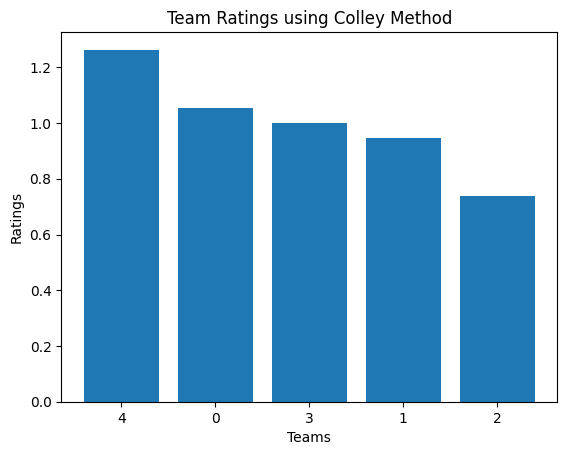

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Number of teams
n = 5

# Initialize the matrix C with diagonal elements as 2 (since 2 is added to games played)
C = 2 * np.eye(n)

# Initialize b with ones (each team starts with a 1-1 record)
b = np.ones(n)

# Simulate games - you can adjust this as required
games = [
    (0, 1, 'win'),  # Team 0 beats Team 1
    (1, 2, 'win'),  # Team 1 beats Team 2
    (2, 3, 'lose'),  # Team 2 beats Team 3
    (3, 4, 'lose'),  # Team 3 beats Team 4
    (4, 0, 'win'),  # Team 4 beats Team 0
    # add more games as required
]

# Update the matrix C and b based on the games
for game in games:
    i, j, result = game
    C[i, i] += 1
    C[j, j] += 1
    C[i, j] -= 1
    C[j, i] -= 1

    if result == 'win':  # i beats j
        b[i] += 1
    elif result == 'lose':  # j beats i
        b[j] += 1
    else:  # j beats i
        b[j] += 1

# Solve the system of equations to get ratings
r = np.linalg.solve(C, b)

# Rank teams based on ratings
ranked_teams = np.argsort(r)[::-1]

# Display results
print("Team rankings:")
for rank, team in enumerate(ranked_teams, 1):
    print(f"Rank {rank}: Team {team} with rating {r[team]:.2f}")

# Visualize team ratings
plt.bar(range(n), r[ranked_teams], tick_label=ranked_teams)
plt.xlabel('Teams')
plt.ylabel('Ratings')
plt.title('Team Ratings using Colley Method')
plt.show()
